In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf

pd.options.display.max_columns = 999

# Loading data sample
Here a complete flight with taxi is loaded

Flight is resampled to 4s to match with model sampling rate recommandation

In [2]:
flight = pd.read_csv("example_flight.csv")
flight = flight.iloc[::4].reset_index()
flight.head()

,index,SYST_TRAJ_ID,FLPL_AIRC_TYPE,PLOT_DATE,FLIGHT_TIME,TIME_LAST_PLOT,ALTI_STD_FT,GRND_SPD_KT,VERT_SPD_FTMN,TRUE_AIR_SPD_KT,MASS_KG,FUEL_FLOW_KGH
0,0,ACPL0000,A320,2023-03-29 16:12:00,0.0,0.0,44.0,2.0,0.0,2.0,58477.143959,0.0
1,4,ACPL0000,A320,2023-03-29 16:12:04,4.0,1.0,44.0,2.0,0.0,2.0,58477.143959,0.0
2,8,ACPL0000,A320,2023-03-29 16:12:08,8.0,1.0,44.0,2.0,0.0,2.0,58477.143959,0.0
3,12,ACPL0000,A320,2023-03-29 16:12:12,12.0,1.0,44.0,2.0,0.0,2.0,58477.143959,0.0
4,16,ACPL0000,A320,2023-03-29 16:12:16,16.0,1.0,44.0,2.0,0.0,2.0,58477.143959,0.0


# Illustrating speed and altitude parameters

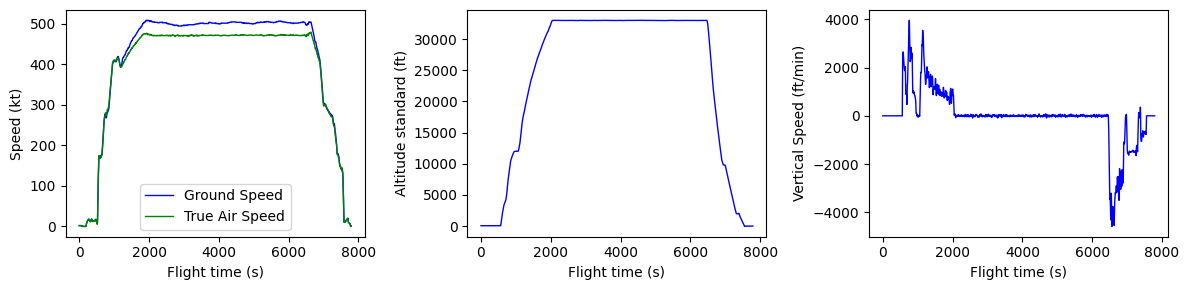

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))
ax1.plot(
    flight.FLIGHT_TIME,
    flight.GRND_SPD_KT,
    color="b",
    lw=1,
    label="Ground Speed",
)

ax1.plot(
    flight.FLIGHT_TIME,
    flight.TRUE_AIR_SPD_KT,
    color="g",
    lw=1,
    label="True Air Speed",
)
ax1.legend()
ax1.set_xlabel("Flight time (s)")
ax1.set_ylabel("Speed (kt)")

ax2.plot(flight.FLIGHT_TIME, flight.ALTI_STD_FT, color="b", lw=1)
ax2.set_xlabel("Flight time (s)")
ax2.set_ylabel("Altitude standard (ft)")

ax3.plot(flight.FLIGHT_TIME, flight.VERT_SPD_FTMN, color="b", lw=1)
ax3.set_xlabel("Flight time (s)")
ax3.set_ylabel("Vertical Speed (ft/min)")

plt.tight_layout()

# Estimate fuel (with all parameters)

In [4]:
from acropole import FuelEstimator

fe = FuelEstimator()

flight_fuel = fe.estimate(
    flight,
    typecode="FLPL_AIRC_TYPE",
    groundspeed="GRND_SPD_KT",
    altitude="ALTI_STD_FT",
    vertical_rate="VERT_SPD_FTMN",
    # optional features:
    second="FLIGHT_TIME",
    airspeed="TRUE_AIR_SPD_KT",
    mass="MASS_KG",
)

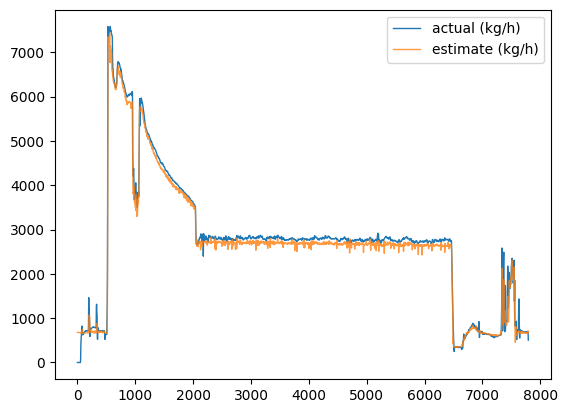

In [5]:
plt.plot(
    flight_fuel.FLIGHT_TIME,
    flight_fuel.FUEL_FLOW_KGH * 2,
    lw=1,
    label="actual (kg/h)",
)
plt.plot(
    flight_fuel.FLIGHT_TIME,
    flight_fuel.fuel_flow_kgh,
    alpha=0.8,
    lw=1,
    label="estimate (kg/h)",
)
plt.legend()

## without mass information

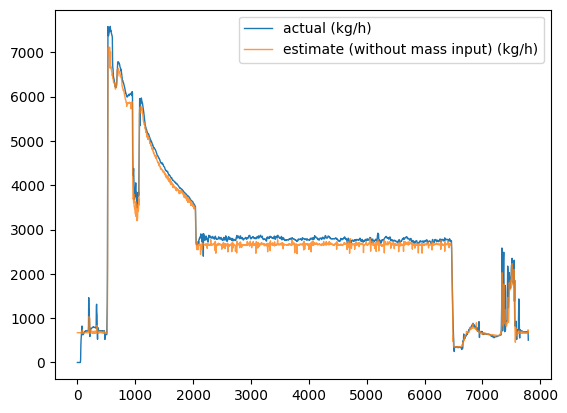

In [6]:
from acropole import FuelEstimator

fr = FuelEstimator()

flight_fuel = fr.estimate(
    flight,
    typecode="FLPL_AIRC_TYPE",
    groundspeed="GRND_SPD_KT",
    altitude="ALTI_STD_FT",
    vertical_rate="VERT_SPD_FTMN",
    # optional features:
    second="FLIGHT_TIME",
    airspeed="TRUE_AIR_SPD_KT",
)

plt.plot(
    flight_fuel.FLIGHT_TIME,
    flight_fuel.FUEL_FLOW_KGH * 2,
    lw=1,
    label="actual (kg/h)",
)
plt.plot(
    flight_fuel.FLIGHT_TIME,
    flight_fuel.fuel_flow_kgh,
    alpha=0.8,
    lw=1,
    label="estimate (without mass input) (kg/h)",
)
plt.legend()
plt.show()

## without mass and airspeed information

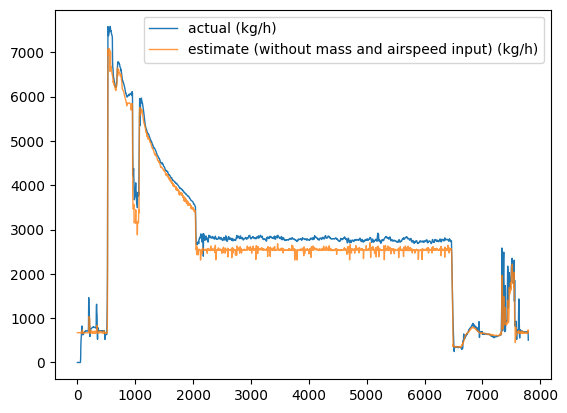

In [7]:
from acropole import FuelEstimator

fr = FuelEstimator()

flight_fuel = fr.estimate(
    flight,
    typecode="FLPL_AIRC_TYPE",
    groundspeed="GRND_SPD_KT",
    altitude="ALTI_STD_FT",
    vertical_rate="VERT_SPD_FTMN",
    # optional features:
    second="FLIGHT_TIME",
)

plt.plot(
    flight_fuel.FLIGHT_TIME,
    flight_fuel.FUEL_FLOW_KGH * 2,
    lw=1,
    label="actual (kg/h)",
)
plt.plot(
    flight_fuel.FLIGHT_TIME,
    flight_fuel.fuel_flow_kgh,
    alpha=0.8,
    lw=1,
    label="estimate (without mass and airspeed input) (kg/h)",
)
plt.legend()
plt.show()

## without mass, airspeed, and time information

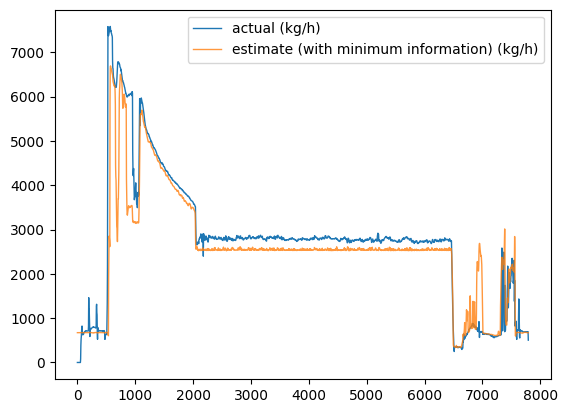

In [8]:
from acropole import FuelEstimator

fr = FuelEstimator()

flight_fuel = fr.estimate(
    flight,
    typecode="FLPL_AIRC_TYPE",
    groundspeed="GRND_SPD_KT",
    altitude="ALTI_STD_FT",
    vertical_rate="VERT_SPD_FTMN",
)

plt.plot(
    flight_fuel.FLIGHT_TIME,
    flight_fuel.FUEL_FLOW_KGH * 2,
    lw=1,
    label="actual (kg/h)",
)
plt.plot(
    flight_fuel.FLIGHT_TIME,
    flight_fuel.fuel_flow_kgh,
    alpha=0.8,
    lw=1,
    label="estimate (with minimum information) (kg/h)",
)
plt.legend()
plt.show()